### World Food Price Analysis - Kenya

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# WorldFoodPrices for Kenya 
WFP = pd.read_csv('wfp_food_prices_ken.csv',encoding='latin-1')

#Kenya rainfall data 
#each file contains the current year and the year before so I downloaded only two to get data from 2017-2022
Rain2018 = pd.read_csv('Kenya__Rainfall2018.csv')

Rain2021=pd.read_csv('Kenya__Rainfall2021.csv')

In [3]:
Rain2018.head(2)

,Year,Month,Dekad,Rainfall (mm),Average (mm)
0,2017,1,1,2.730,6.960
1,2017,1,2,1.959,6.215


In [4]:
Rain2021.tail(2)

,Year,Month,Dekad,Rainfall (mm),Average (mm)
106,2022,12,2,NaN,17.408
107,2022,12,3,NaN,17.112


In [5]:
WFP.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,15/01/2006,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
1,15/01/2006,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041
2,15/01/2006,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
3,15/01/2006,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705
4,15/01/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355


In [7]:
#add a column that shows just the year and another that shows the month
WFP['date'] = pd.to_datetime(WFP['date'])
WFP['Year'], WFP['Month'] = WFP['date'].dt.year, WFP['date'].dt.month
WFP

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Year,Month
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,2006,1
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041,2006,1
2,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,2006,1
3,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705,2006,1
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355,2006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14445,2022-07-15,Nyanza,Kisumu,Kisumu,-0.100000,34.750000,cereals and tubers,Maize,KG,forecast,Wholesale,KES,0.00,0.0000,2022,7
14446,2022-07-15,Rift Valley,Uasin Gishu,Eldoret town (Uasin Gishu),0.516667,35.283333,cereals and tubers,Maize,KG,forecast,Wholesale,KES,0.00,0.0000,2022,7
14447,2022-08-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Maize,KG,forecast,Wholesale,KES,0.00,0.0000,2022,8
14448,2022-08-15,Nyanza,Kisumu,Kisumu,-0.100000,34.750000,cereals and tubers,Maize,KG,forecast,Wholesale,KES,0.00,0.0000,2022,8


In [8]:
#in order to compare with the rainfall data consider only 6 years - post 2016
WFPpost2016 = WFP[WFP['Year'] > 2016]
WFPpost2016.head(2)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Year,Month
4595,2017-01-15,Coast,Kilifi,Kilifi,-3.6301,39.85113,cereals and tubers,Maize (white),KG,actual,Retail,KES,40.0,0.3876,2017,1
4596,2017-01-15,Coast,Kilifi,Kilifi,-3.6301,39.85113,pulses and nuts,Beans (dry),KG,actual,Retail,KES,98.0,0.9496,2017,1


In [9]:
#Only compare actual price, forecast and aggregate will not be considered. Filter for actual 
WFPpost2016[WFPpost2016['priceflag']== 'actual']

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Year,Month
4595,2017-01-15,Coast,Kilifi,Kilifi,-3.630100,39.851130,cereals and tubers,Maize (white),KG,actual,Retail,KES,40.00,0.3876,2017,1
4596,2017-01-15,Coast,Kilifi,Kilifi,-3.630100,39.851130,pulses and nuts,Beans (dry),KG,actual,Retail,KES,98.00,0.9496,2017,1
4597,2017-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,37.67,0.3650,2017,1
4598,2017-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,3135.00,30.3788,2017,1
4599,2017-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,81.29,0.7877,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,2022-10-15,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,pulses and nuts,Beans (rosecoco),90 KG,actual,Wholesale,KES,9432.00,79.3939,2022,10
9975,2022-10-15,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Cabbage,126 KG,actual,Wholesale,KES,2007.18,16.8955,2022,10
9976,2022-10-15,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Kale,50 KG,actual,Wholesale,KES,1385.00,11.6582,2022,10
9977,2022-10-15,Rift Valley,West Pokot,Makutano (West Pokot),1.253093,35.076653,vegetables and fruits,Onions (dry),13 KG,actual,Wholesale,KES,643.50,5.4167,2022,10


In [10]:
#combine the rain data
RainKenya = pd.concat([Rain2018,Rain2021])

In [11]:
RainKenya = RainKenya.groupby(['Year','Month']).mean().reset_index()
RainKenya

,Year,Month,Dekad,Rainfall (mm),Average (mm)
0,2017,1,2.0,3.473667,6.297333
1,2017,2,2.0,8.184000,5.257667
2,2017,3,2.0,7.996000,18.918667
3,2017,4,2.0,27.642667,38.686333
4,2017,5,2.0,24.675667,20.871000
...,...,...,...,...,...
67,2022,8,2.0,10.984667,8.486333
68,2022,9,2.0,7.958667,6.362667
69,2022,10,2.0,11.618333,17.136333
70,2022,11,2.0,25.493000,33.147000


Below we find the mean of the food prices of the different categories each month of the 6 years under analysis. 

In [12]:
WFPpost2016 = WFPpost2016.groupby(['Year','category','Month']).mean().reset_index()
WFPpost2016

,Year,category,Month,latitude,longitude,price,usdprice
0,2017,cereals and tubers,1,-0.522076,36.987175,1716.594667,16.634140
1,2017,cereals and tubers,2,-0.522076,36.987175,1886.212667,18.543190
2,2017,cereals and tubers,3,-0.495826,36.993055,2053.043103,20.339238
3,2017,cereals and tubers,4,-0.522076,36.987175,2227.460000,21.602527
4,2017,cereals and tubers,5,-0.522076,36.987175,2263.951333,22.342360
...,...,...,...,...,...,...,...
367,2022,vegetables and fruits,6,-0.355526,37.180499,2701.500000,23.248716
368,2022,vegetables and fruits,7,-0.355868,37.069747,2378.491228,20.294291
369,2022,vegetables and fruits,8,-0.160064,36.905363,2194.886667,18.530067
370,2022,vegetables and fruits,9,-0.372613,37.096931,2171.230678,18.184507


In [13]:
#drop columns not needed in both tables 
WFPpost2016.drop(['latitude','longitude'], axis=1, inplace=True)

RainKenya.drop('Dekad', axis=1, inplace=True) 

In [14]:
#merge rain data with food prices in order to have one table for analysis
WFPxRain = pd.merge(RainKenya, WFPpost2016[['Year','category','price','usdprice']],  on=['Year'],how='left')
WFPxRain

,Year,Month,Rainfall (mm),Average (mm),category,price,usdprice
0,2017,1,3.473667,6.297333,cereals and tubers,1716.594667,16.634140
1,2017,1,3.473667,6.297333,cereals and tubers,1886.212667,18.543190
2,2017,1,3.473667,6.297333,cereals and tubers,2053.043103,20.339238
3,2017,1,3.473667,6.297333,cereals and tubers,2227.460000,21.602527
4,2017,1,3.473667,6.297333,cereals and tubers,2263.951333,22.342360
...,...,...,...,...,...,...,...
4459,2022,12,NaN,19.000333,vegetables and fruits,2701.500000,23.248716
4460,2022,12,NaN,19.000333,vegetables and fruits,2378.491228,20.294291
4461,2022,12,NaN,19.000333,vegetables and fruits,2194.886667,18.530067
4462,2022,12,NaN,19.000333,vegetables and fruits,2171.230678,18.184507


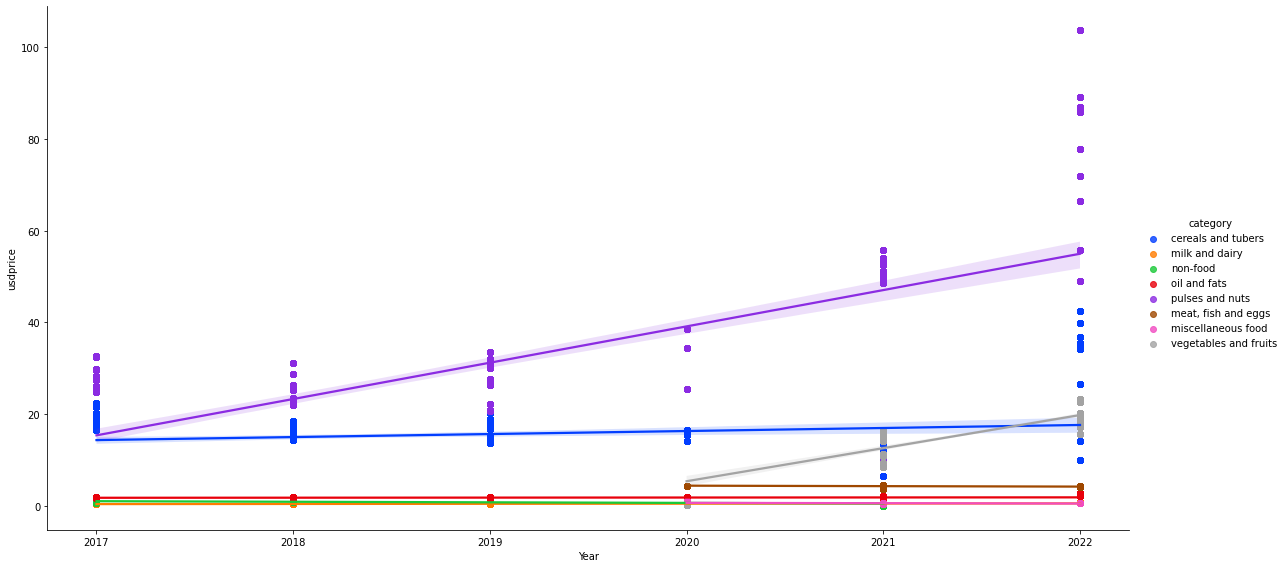

In [15]:
g= sns.FacetGrid(data = WFPxRain, hue = 'category', height=8, aspect=2, palette='bright')
g.map(sns.regplot,'Year','usdprice')
g.add_legend()

### Over the last 6 years, pulses and nuts have recorded a steady increase in prices, the same applies to vegetables and fruits from 2020

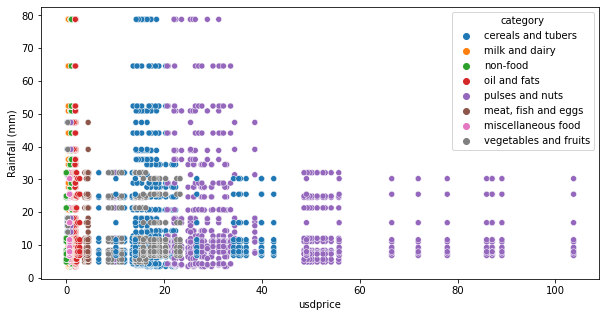

In [19]:
plt.figure(figsize=[10,5])
g =sns.scatterplot(data= WFPxRain, x='usdprice', y='Rainfall (mm)', hue='category', legend = 'full')

Text(0, 0.5, 'Rainfall (mm)')

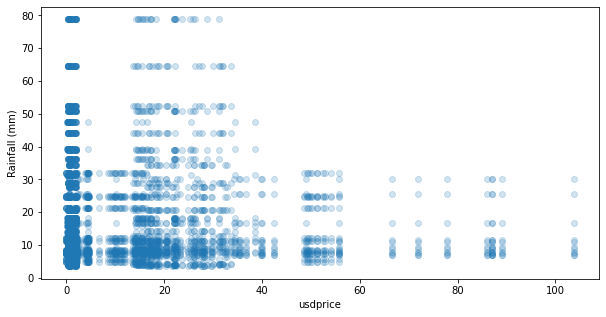

In [20]:
plt.figure(figsize=[10,5])
plt.scatter(data = WFPxRain,  x= 'usdprice', y = 'Rainfall (mm)', alpha=1/5)
plt.xlabel('usdprice')
plt.ylabel('Rainfall (mm)')


### Rainfall impacts the prices; the more rainfall, the less the food prices and vice versa

Text(0, 0.5, 'usdprice')

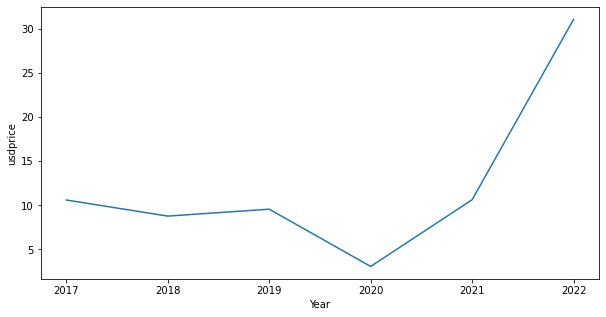

In [21]:
#show how food prices have generally increased over the years
plt.figure(figsize=[10,5])
WFPxRain.groupby('Year')['usdprice'].mean().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('usdprice')

#### The analysis only focuses on the actual prices of goods in the dataset. However it is possibly inaccurate to an extent because the quantity of goods appear to differ. In the unit column some rows simply have KG while others have numbers before them like 90KG, 126KG, 50KG. So is it possible goods of different sizes are being compared?

The analysis is not conducted by region because the rainfall data was only available for the entire country. 